### Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import seaborn as sns

from keras.layers import Activation, Conv2D, BatchNormalization, Dense, Flatten, Dropout, MaxPooling2D
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.losses import CategoricalCrossentropy
from sklearn.metrics import confusion_matrix

### Import data

In [2]:
data = np.load('/content/drive/My Drive/Data Science/DataSet/NPZ/masks_data.npz')
x_train, x_test, y_train, y_test = data['x_train'], data['x_test'], data['y_train'], data['y_test']

In [3]:
print('x_train shape: {}'.format(x_train.shape))
print('x_test shape: {}'.format(x_test.shape))
print('y_train shape: {}'.format(y_train.shape))
print('y_test shape: {}'.format(y_test.shape))

x_train shape: (5864, 64, 64, 3)
x_test shape: (1466, 64, 64, 3)
y_train shape: (5864, 3)
y_test shape: (1466, 3)


### Build our model

In [4]:
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape=x_train.shape[1:], activation='relu'))
model.add(MaxPooling2D((2,2), strides=(1,1), padding='same'))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), input_shape=x_train.shape[1:], activation='relu'))
model.add(MaxPooling2D((2,2), strides=(1,1), padding='same'))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3,3), input_shape=x_train.shape[1:], activation='relu'))
model.add(MaxPooling2D((2,2), strides=(1,1), padding='same'))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 62, 62, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 60, 60, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 60, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 58, 58, 128)       7

In [5]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
CALLBACKS = EarlyStopping(monitor='val_accuracy', patience=10)

In [7]:
EPOCHS = 100

In [8]:
%%time
history = model.fit(
    x_train,
    y_train,
    epochs=EPOCHS,
    validation_data=(x_test, y_test),
    callbacks=[CALLBACKS]
)

Epoch 1/100
184/184 [==============================] - 445s 2s/step - loss: 0.7935 - accuracy: 0.7740 - val_loss: 0.2481 - val_accuracy: 0.9106
Epoch 2/100
184/184 [==============================] - 446s 2s/step - loss: 0.2526 - accuracy: 0.9159 - val_loss: 0.2026 - val_accuracy: 0.9461
Epoch 3/100
184/184 [==============================] - 452s 2s/step - loss: 0.1694 - accuracy: 0.9454 - val_loss: 0.1462 - val_accuracy: 0.9516
Epoch 4/100
184/184 [==============================] - 449s 2s/step - loss: 0.1401 - accuracy: 0.9553 - val_loss: 0.1352 - val_accuracy: 0.9468
Epoch 5/100
184/184 [==============================] - 455s 2s/step - loss: 0.1309 - accuracy: 0.9601 - val_loss: 0.1224 - val_accuracy: 0.9563
Epoch 6/100
184/184 [==============================] - 450s 2s/step - loss: 0.1102 - accuracy: 0.9671 - val_loss: 0.1465 - val_accuracy: 0.9379
Epoch 7/100
184/184 [==============================] - 449s 2s/step - loss: 0.1292 - accuracy: 0.9599 - val_loss: 0.0843 - val_accuracy:

### Test the model

In [9]:
model.evaluate(x_test, y_test)

46/46 [==============================] - 21s 463ms/step - loss: 0.0823 - accuracy: 0.9754


[0.08232605457305908, 0.9754433631896973]

### Plot the model history

In [10]:
yhat = np.argmax(model.predict(x_test), axis=1)
y = np.argmax(y_test, axis=1)

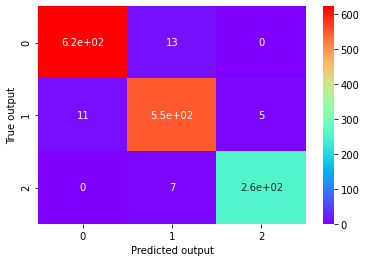

In [11]:
sns.heatmap(confusion_matrix(yhat, y), annot=True, cmap='rainbow')
plt.xlabel('Predicted output')
plt.ylabel('True output')
plt.show()

### Plot the loss and accurcy of model

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
l = history.history['loss']
val_l = history.history['val_loss']
epoch_len = range(1,len(l)+1)

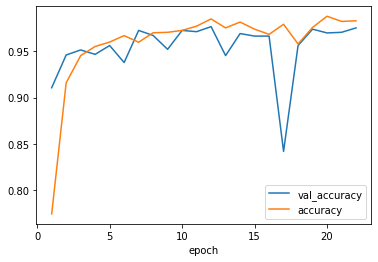

In [13]:
plt.plot(epoch_len, val_acc, label='val_accuracy')
plt.plot(epoch_len, acc, label='accuracy')
plt.xlabel('epoch')
plt.ylabel('')
plt.legend()
plt.show()

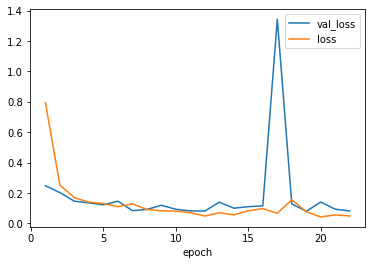

In [14]:
plt.plot(epoch_len, val_l, label='val_loss')
plt.plot(epoch_len, l, label='loss')
plt.xlabel('epoch')
plt.ylabel('')
plt.legend()
plt.show()

In [15]:
model.save('/content/drive/My Drive/Data Science/Project/mask_detector_AI.h5')